
Data documentation: https://tidyr.tidyverse.org/reference/who.html


In [574]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3

df = pd.read_csv('who.csv')

In [575]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

In [601]:
df.head()

,country,year,value,diagnosis_method,Gender,Age
18,Afghanistan,1998,30.0,PulmonarySmear+,Male,0-14
19,Afghanistan,1999,8.0,PulmonarySmear+,Male,0-14
20,Afghanistan,2000,52.0,PulmonarySmear+,Male,0-14
21,Afghanistan,2001,129.0,PulmonarySmear+,Male,0-14
22,Afghanistan,2002,90.0,PulmonarySmear+,Male,0-14


#### Question 1. We need to know what's included in this data.
- How many countries are present?  
- What's the timespan of the data?  
- Does each country have a row for every year present?  
- Which countries are missing years?  
- How many rows have at least 1 non-null values across the columns 3-57?

#### How many countries are present?

In [577]:
print('Number of countries present:', len(df.country.unique()))

Number of countries present: 219


#### What's the timespan of the data?

In [578]:

print('Timespan of the data:',df.year.max()-df.year.min(),'years')
    

Timespan of the data: 33 years


#### Does each country have a row for every year present?

In [579]:
#Total Number of countries 
len(df.year.unique())

34

In [580]:
every_country= (df.groupby('country')['year'].count())==34
print('Each country have a row for every year present :',all(every_country))

Each country have a row for every year present : False


#### Which countries are missing years?

In [581]:
print('Countries which are missing years :')
for i,j in every_country.iteritems():
    if j == False:
        print('-',i)

Countries which are missing years :
- Bonaire, Saint Eustatius and Saba
- Curacao
- Montenegro
- Netherlands Antilles
- Serbia
- Serbia & Montenegro
- Sint Maarten (Dutch part)
- South Sudan
- Timor-Leste


#### How many rows have at least 1 non-null values across the columns 3-57?

In [582]:
new_df =df.drop(['country', 'year'], axis=1)
new_df.head()

,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,new_sp_f1524,new_sp_f2534,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [602]:
new_df[new_df.notnull().any(1)].head()

,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,new_sp_f1524,new_sp_f2534,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
17,0.0,10.0,6.0,3.0,5.0,2.0,0.0,5.0,38.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,30.0,129.0,128.0,90.0,89.0,64.0,41.0,45.0,350.0,419.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,8.0,55.0,55.0,47.0,34.0,21.0,8.0,25.0,139.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,52.0,228.0,183.0,149.0,129.0,94.0,80.0,93.0,414.0,565.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,129.0,379.0,349.0,274.0,204.0,139.0,103.0,146.0,799.0,888.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Number of rows have at least 1 non-null values across the columns 3-57 : 3484

#### Question 2: Wide data isn't usually helpful.
Convert this to a long format with the following columns:  
1. country  
2. year  
3. diagnosis method: mapping should be: 

  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
  

4. gender: male or female.   
5. age: lower_age - higher_age, e.g., 0-14  
6. number of cases  

In [584]:
# Code
df=pd.melt(df, id_vars=['country','year'])

In [585]:
df['variable'] = df.variable.str.replace('new_sp', 'PulmonarySmear+')
df['variable'] = df.variable.str.replace('new_sn', 'PulmonarySmear-')
df['variable'] = df.variable.str.replace('new_ep', 'Extrapulmonary')
df['variable'] = df.variable.str.replace('newrel', 'Relapse')

In [586]:
df.head()

,country,year,variable,value
0,Afghanistan,1980,PulmonarySmear+_m014,NaN
1,Afghanistan,1981,PulmonarySmear+_m014,NaN
2,Afghanistan,1982,PulmonarySmear+_m014,NaN
3,Afghanistan,1983,PulmonarySmear+_m014,NaN
4,Afghanistan,1984,PulmonarySmear+_m014,NaN


In [587]:
df[['diagnosis_method','variable']] = df.variable.str.split("_",expand=True)

In [588]:
df['variable'] = df.variable.str.replace('m', 'Male_')
df['variable'] = df.variable.str.replace('f', 'Female_')

In [589]:
df.head()

,country,year,variable,value,diagnosis_method
0,Afghanistan,1980,Male_014,NaN,PulmonarySmear+
1,Afghanistan,1981,Male_014,NaN,PulmonarySmear+
2,Afghanistan,1982,Male_014,NaN,PulmonarySmear+
3,Afghanistan,1983,Male_014,NaN,PulmonarySmear+
4,Afghanistan,1984,Male_014,NaN,PulmonarySmear+


In [590]:
df[['Gender','Age']] = df.variable.str.split("_",expand=True)

In [591]:
df.head()

,country,year,variable,value,diagnosis_method,Gender,Age
0,Afghanistan,1980,Male_014,NaN,PulmonarySmear+,Male,014
1,Afghanistan,1981,Male_014,NaN,PulmonarySmear+,Male,014
2,Afghanistan,1982,Male_014,NaN,PulmonarySmear+,Male,014
3,Afghanistan,1983,Male_014,NaN,PulmonarySmear+,Male,014
4,Afghanistan,1984,Male_014,NaN,PulmonarySmear+,Male,014


In [592]:
df['Age'] = df.Age.str.replace('014', '0-14')
df['Age'] = df.Age.str.replace('1524', '15-24')
df['Age'] = df.Age.str.replace('2534', '25-34')
df['Age'] = df.Age.str.replace('3544', '35-44')
df['Age'] = df.Age.str.replace('4554', '45-54')
df['Age'] = df.Age.str.replace('5564', '55-64')

In [593]:
df=df.drop(['variable'],axis=1)
df.head()

,country,year,value,diagnosis_method,Gender,Age
0,Afghanistan,1980,NaN,PulmonarySmear+,Male,0-14
1,Afghanistan,1981,NaN,PulmonarySmear+,Male,0-14
2,Afghanistan,1982,NaN,PulmonarySmear+,Male,0-14
3,Afghanistan,1983,NaN,PulmonarySmear+,Male,0-14
4,Afghanistan,1984,NaN,PulmonarySmear+,Male,0-14


#### Question 3: Create a graph that shows when countries started to report TB cases.

In [594]:
df.head()

,country,year,value,diagnosis_method,Gender,Age
0,Afghanistan,1980,NaN,PulmonarySmear+,Male,0-14
1,Afghanistan,1981,NaN,PulmonarySmear+,Male,0-14
2,Afghanistan,1982,NaN,PulmonarySmear+,Male,0-14
3,Afghanistan,1983,NaN,PulmonarySmear+,Male,0-14
4,Afghanistan,1984,NaN,PulmonarySmear+,Male,0-14


In [595]:
df.value.replace(0, np.nan, inplace=True)
df.head()

,country,year,value,diagnosis_method,Gender,Age
0,Afghanistan,1980,NaN,PulmonarySmear+,Male,0-14
1,Afghanistan,1981,NaN,PulmonarySmear+,Male,0-14
2,Afghanistan,1982,NaN,PulmonarySmear+,Male,0-14
3,Afghanistan,1983,NaN,PulmonarySmear+,Male,0-14
4,Afghanistan,1984,NaN,PulmonarySmear+,Male,0-14


In [596]:
df = df.dropna()
df.head()

,country,year,value,diagnosis_method,Gender,Age
18,Afghanistan,1998,30.0,PulmonarySmear+,Male,0-14
19,Afghanistan,1999,8.0,PulmonarySmear+,Male,0-14
20,Afghanistan,2000,52.0,PulmonarySmear+,Male,0-14
21,Afghanistan,2001,129.0,PulmonarySmear+,Male,0-14
22,Afghanistan,2002,90.0,PulmonarySmear+,Male,0-14


In [597]:
reported_year_df = df[['country','year']].copy()
reported_year_df=reported_year_df.drop_duplicates('country', keep='first')

reported_year_df.head()

,country,year
18,Afghanistan,1998
52,Albania,1998
85,Algeria,1997
119,American Samoa,1997
185,Angola,1995


In [598]:
reported_year_df.set_index('country')

,year
country,
Afghanistan,1998
Albania,1998
Algeria,1997
American Samoa,1997
Angola,1995
...,...
Curacao,2010
British Virgin Islands,2004
Monaco,1999


In [599]:
# Increasing the size of output window
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 100em; }</style>"))



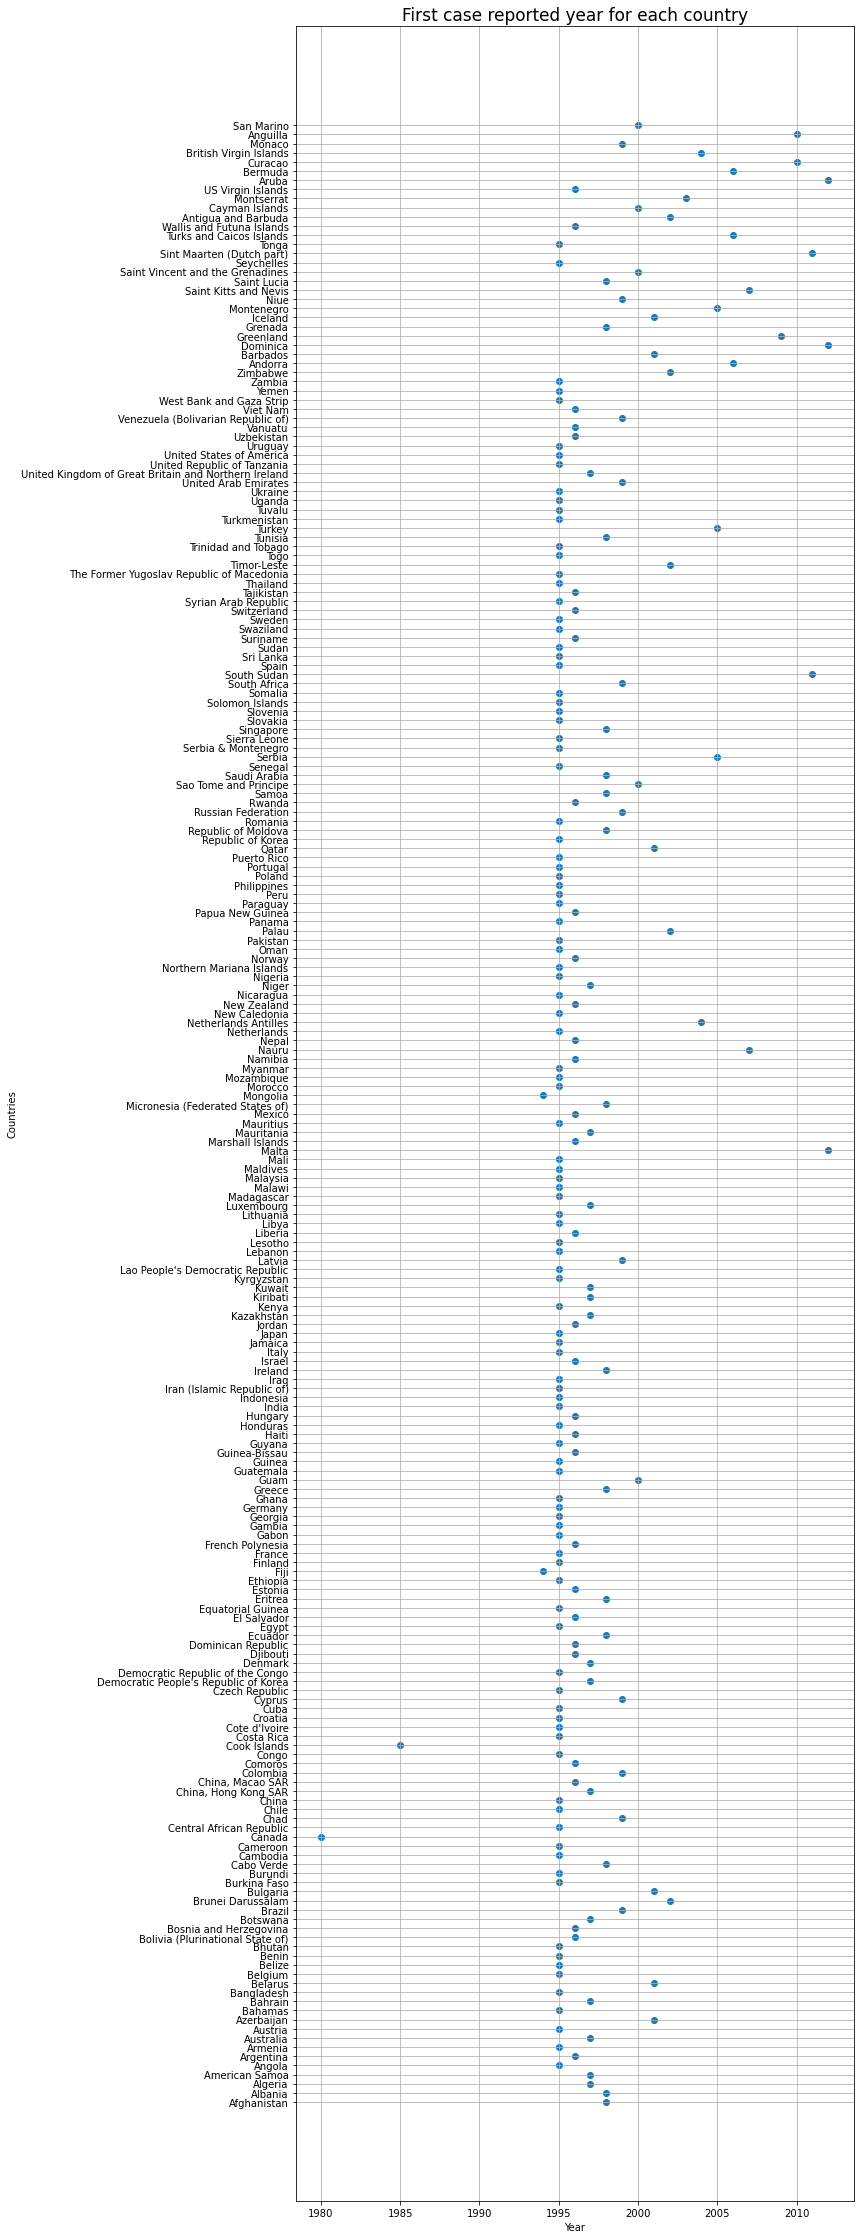

In [600]:
fig= plt.figure(figsize=(10,40))
plt.scatter(reported_year_df['year'],reported_year_df['country'])
plt.title("First case reported year for each country", fontsize =17)
plt.xlabel("Year")
plt.ylabel("Countries")
plt.grid()
plt.show()
